<a href="https://colab.research.google.com/github/sourangshupal/100DaysOfMLCode/blob/master/Assignment_4_2nd_iteration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Building the second model architecture for MNIST dataset

## Objective

1. **Less than 15000 parameters**
2. **Validation accuracy to be acheived 99.40**


### Building our second model which will be an advancement over the simple vanilla network which we built in our previous code file.

In [1]:
# https://keras.io/
#We are first installing the keras package via pip install and importing the keras package
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
# importing the numpy package with the alias np
import numpy as np

# importing sequential model from keras.models
from keras.models import Sequential
# importing different layers and activations from keras.layers
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
# importing np_utils from keras.utils
from keras.utils import np_utils

# importing the mnist dataset from keras.datasets 
from keras.datasets import mnist

In [3]:
# we are downloading the MNIST dataset and splitting the data for training and testing
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


(60000, 28, 28)


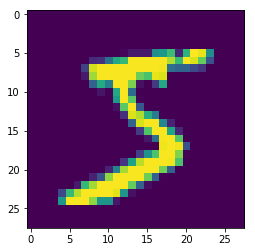

In [4]:

# printing out the shape of x_train
print (X_train.shape)

# importing pyplot with alias plt from matplotlib package
from matplotlib import pyplot as plt
# %matplotlib inline is a magic function to show us the plots in a notebook
%matplotlib inline
# plotting the first image or the image at index zero in the training dataset
plt.imshow(X_train[0])

In [0]:
#Reshaping our training and testing datatset using numpy's reshape function which we will feed to the model
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
#Doing type conversion or changing the datatype to float32 for the data
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
#Doing standardization or normalization here dividind each pixel by 255 in the train and test data
X_train /= 255
X_test /= 255

In [7]:
#Checking first 10 image labels
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
# simply we can say we are doing sort of onehot encoding
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
# having a look in the first 10 datapoints after onehot encoding
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
# importing warnings to filter out warnings which are sometimes annoying.
import warnings
warnings.filterwarnings("ignore")

## Model Architecture 2

Here we will be doing some improvements over the simple vanilla network

### Improvements which will be done in the previous network are
1. Addition of **1x1 convolution**
2. Addition of **BatchNormalization after each convolution layer**


Hope to see some improvements in our results. Our last result or the validation accuracy was 99.15. We are hoping to get result above 99.15.

Let's see how this architecture performs.


*Maximum 3 can be done. We are doing only 2 improvements so rule is not broken.*

In [0]:
#importing Activation, BatchNormalization and MaxPooling2D from keras.layers for performing maxpooling and batchnormalizing operations and adding non linearity via activation functions
from keras.layers import Activation,BatchNormalization
# building our sequential model using the Sequential class and creating the model object
model = Sequential()
# Performing 3x3 2dconvolution with 10 kernels followed by BatchNormalization layer
model.add(Convolution2D(10,3,3, activation="relu", input_shape=(28,28,1)))#channel dimensions = 26x26x10    and Receptive field = 3x3
model.add(BatchNormalization())

# Performing 3x3 2dconvolution with 20 kernels followed by BatchNormalization layer
model.add(Convolution2D(20,3,3, activation="relu"))                       #channel dimensions = 26x26x10    and Receptive field = 5x5
model.add(BatchNormalization())

# Performing 3x3 2dconvolution with 10 kernels followed by BatchNormalization layer
model.add(Convolution2D(10,3,3, activation="relu"))                       #channel dimensions = 26x26x10    and Receptive field = 7x7
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2,2)))                                  #channel dimensions = 26x26x10    and Receptive field = 14x14
# Performing 1x1 2dconvolution with 10 kernels followed by BatchNormalization layer
model.add(Convolution2D(10, 1, 1, activation='relu'))                     #channel dimensions = 26x26x10    and Receptive field = 14x14
model.add(BatchNormalization())

# Performing 3x3 2dconvolution with 16 kernels followed by BatchNormalization layer
model.add(Convolution2D(16, 3, 3, activation='relu'))                     #channel dimensions = 26x26x10    and Receptive field = 16x16
model.add(BatchNormalization())

# Performing 3x3 2dconvolution with 16 kernels followed by BatchNormalization layer
model.add(Convolution2D(16, 3, 3, activation='relu'))                     #channel dimensions = 26x26x10    and Receptive field = 18x18
model.add(BatchNormalization())

# Performing 3x3 2dconvolution with 16 kernels followed by BatchNormalization layer
model.add(Convolution2D(16, 3, 3, activation='relu'))                     #channel dimensions = 26x26x10    and Receptive field = 20x20
model.add(BatchNormalization())

# Performing 3x3 2dconvolution with 16 kernels followed by BatchNormalization layer
model.add(Convolution2D(16, 3, 3, activation='relu'))                     #channel dimensions = 26x26x10    and Receptive field = 22x22
model.add(BatchNormalization())

# Performing 3x3 2dconvolution with 10 kernels
model.add(Convolution2D(10, 3, 3))                                        #channel dimensions = 26x26x10    and Receptive field = 24x24


# Here we are Flateening our dat i.e making it one dimensional which we will feed to the network.
model.add(Flatten())
#Using softmax activation function at the last layer which is used for multi class classification
model.add(Activation('softmax'))

In [20]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 26, 26, 10)        100       
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 24, 24, 20)        1820      
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 22, 22, 10)        1810      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 11, 11, 10)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 11, 11, 10)        110       
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 9, 9, 16)          1456      
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 7, 7, 16)          2320      
__________

### Total number of parameters are 13706 which is below 15000 so we are good to move to train our model.

In [0]:
# We are importing the Adam Optimizer
from keras.optimizers import Adam

model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [27]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=20, verbose=1)

Epoch 1/20
60000/60000 [==============================] - 23s 388us/step - loss: 0.2066 - acc: 0.9372
Epoch 2/20
60000/60000 [==============================] - 23s 377us/step - loss: 0.0636 - acc: 0.9805
Epoch 3/20
60000/60000 [==============================] - 21s 355us/step - loss: 0.0484 - acc: 0.9849
Epoch 4/20
60000/60000 [==============================] - 21s 358us/step - loss: 0.0400 - acc: 0.9880
Epoch 5/20
60000/60000 [==============================] - 22s 359us/step - loss: 0.0355 - acc: 0.9888
Epoch 6/20
60000/60000 [==============================] - 22s 373us/step - loss: 0.0314 - acc: 0.9902
Epoch 7/20
60000/60000 [==============================] - 21s 352us/step - loss: 0.0278 - acc: 0.9914
Epoch 8/20
60000/60000 [==============================] - 21s 350us/step - loss: 0.0257 - acc: 0.9918
Epoch 9/20
60000/60000 [==============================] - 22s 368us/step - loss: 0.0226 - acc: 0.9931
Epoch 10/20
60000/60000 [==============================] - 21s 356us/step - loss: 

In [28]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.0288882976109584, 0.9921]


## Vadidaton  Accuracy = 99.21

## Result

Here we are able to see some improvements from the previous network which we built. Our validation accuracy has increased from 99.15 to 99.21  We can say that some improvement in this network is seen. Batch Normalization and 1x1 conolutions really helped us.

In the next network we will be building we will adding more improvements over this model architecture.